This is a Logistic Regression model for the prediction of Survival in the Titanic Ship

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from utils import *

plt.style.use('deeplearning.mplstyle')

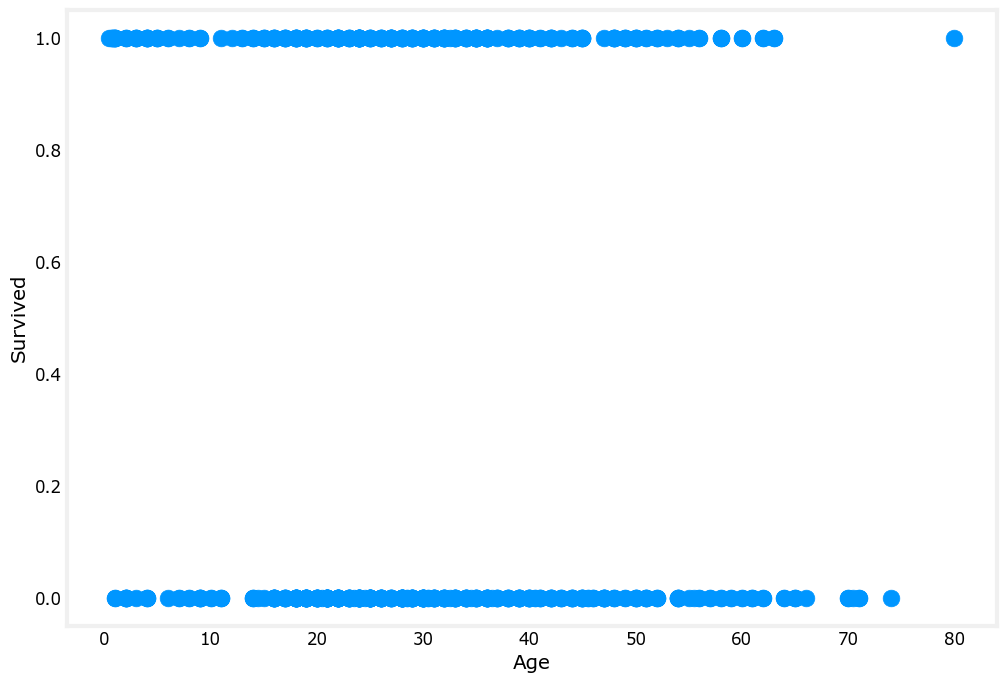

In [8]:
# Visualization of data
file_path = './data/train.csv'
pdv = pd.read_csv(file_path)
plt.scatter(pdv['Age'], pdv['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [9]:
# Preprocessing data
df = modify_data(file_path)

data before processing...
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [10]:
# Splitting data into train and cross validation
X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'The X train and X cv are: {X_train.shape}, {X_cv.shape}')
print(f'The y train and y cv are: {y_train.shape}, {y_cv.shape}')


The X train and X cv are: (712, 28), (179, 28)
The y train and y cv are: (712,), (179,)


In [12]:
# Building a Logistic Regression Model
degree = 4
models = []
polys = []
scalers = []
f1_scores = np.zeros((degree, 2))
precisions = np.zeros((degree, 2))
recalls = np.zeros((degree, 2))
accuracy_scores = np.zeros((degree, 2))

for i in range(1, degree + 1):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)
    polys.append(poly)
    
    scaler = StandardScaler()
    X_train_mapp = scaler.fit_transform(X_train_poly)
    X_cv_mapp = scaler.transform(X_cv_poly)
    scalers.append(scaler)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_mapp, y_train)
    models.append(model)
    
    yhat = model.predict(X_train_mapp)
    f1_scores[i-1, 0] = f1_score(y_train, yhat)
    precisions[i-1, 0] = precision_score(y_train, yhat)
    recalls[i-1, 0] = recall_score(y_train, yhat)
    accuracy_scores[i-1, 0] = accuracy_score(y_train, yhat)
    
    yhat_cv = model.predict(X_cv_mapp)
    f1_scores[i-1, 1] = f1_score(y_cv, yhat_cv)
    precisions[i-1, 1] = precision_score(y_cv, yhat_cv)
    recalls[i-1, 1] = recall_score(y_cv, yhat_cv)
    accuracy_scores[i-1, 1] = accuracy_score(y_cv, yhat_cv)
    
print('Results: ')
for i in range (degree): 
    print(f'For degree {i+1} the metrics are f1 score: {f1_scores[i]}, precision: {precisions[i]}, recall: {recalls[i]}, accuracy: {accuracy_scores[i]}')

Results: 
For degree 1 the metrics are f1 score: [0.76300578 0.73469388], precision: [0.78884462 0.73972603], recall: [0.73880597 0.72972973], accuracy: [0.82724719 0.78212291]
For degree 2 the metrics are f1 score: [0.82591093 0.75524476], precision: [0.90265487 0.7826087 ], recall: [0.76119403 0.72972973], accuracy: [0.87921348 0.80446927]
For degree 3 the metrics are f1 score: [0.84920635 0.73611111], precision: [0.90677966 0.75714286], recall: [0.79850746 0.71621622], accuracy: [0.89325843 0.7877095 ]
For degree 4 the metrics are f1 score: [0.86055777 0.73611111], precision: [0.92307692 0.75714286], recall: [0.80597015 0.71621622], accuracy: [0.90168539 0.7877095 ]


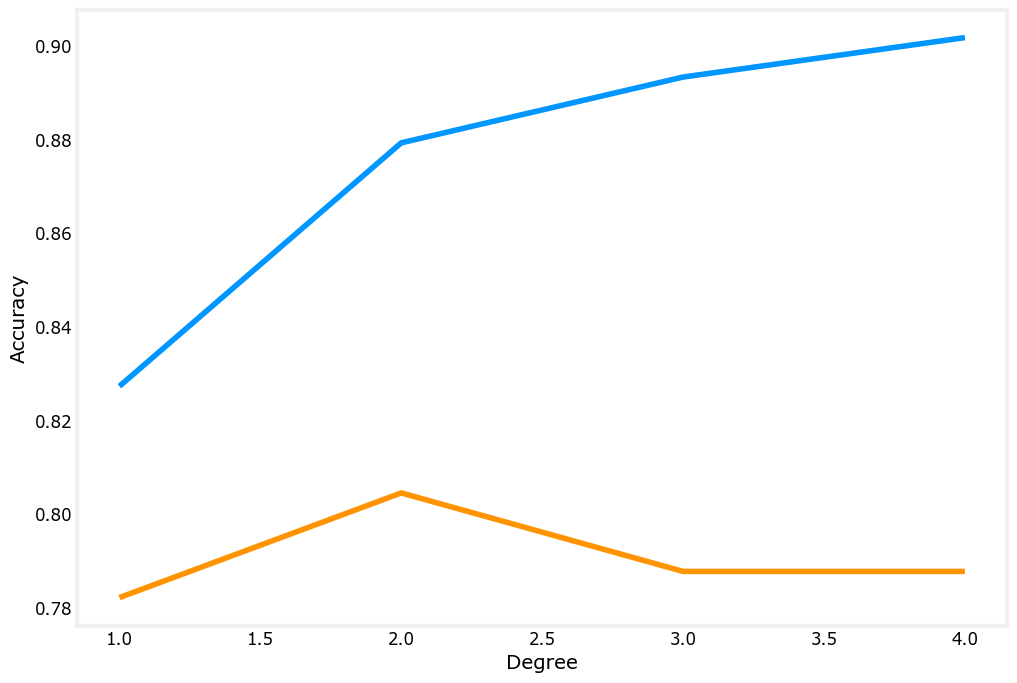

In [15]:
# Visualization of the results
plt.plot(range(1, degree + 1), accuracy_scores[:, 0], label='Accuracy Score')
plt.plot(range(1, degree + 1), accuracy_scores[:, 1], label='Accuracy Score')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 